(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week05/notebook/demo.ipynb)

We will work with the Titanic datasets from Kaggle.
https://www.kaggle.com/competitions/titanic/data

| Variable   | Definition                                | Key                                  |
|------------|-------------------------------------------|--------------------------------------|
| survival   | Survival                                 | 0 = No, 1 = Yes                     |
| pclass     | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex        | Sex                                      |                                      |
| Age        | Age in years                             |                                      |
| sibsp      | # of siblings / spouses aboard the Titanic |                                      |
| parch      | # of parents / children aboard the Titanic |                                      |
| ticket     | Ticket number                            |                                      |
| fare       | Passenger fare                           |                                      |
| cabin      | Cabin number                             |                                      |
| embarked   | Port of Embarkation                     | C = Cherbourg, Q = Queenstown, S = Southampton |


# 1. Loading the data

In [2]:
import pandas as pd

In [5]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


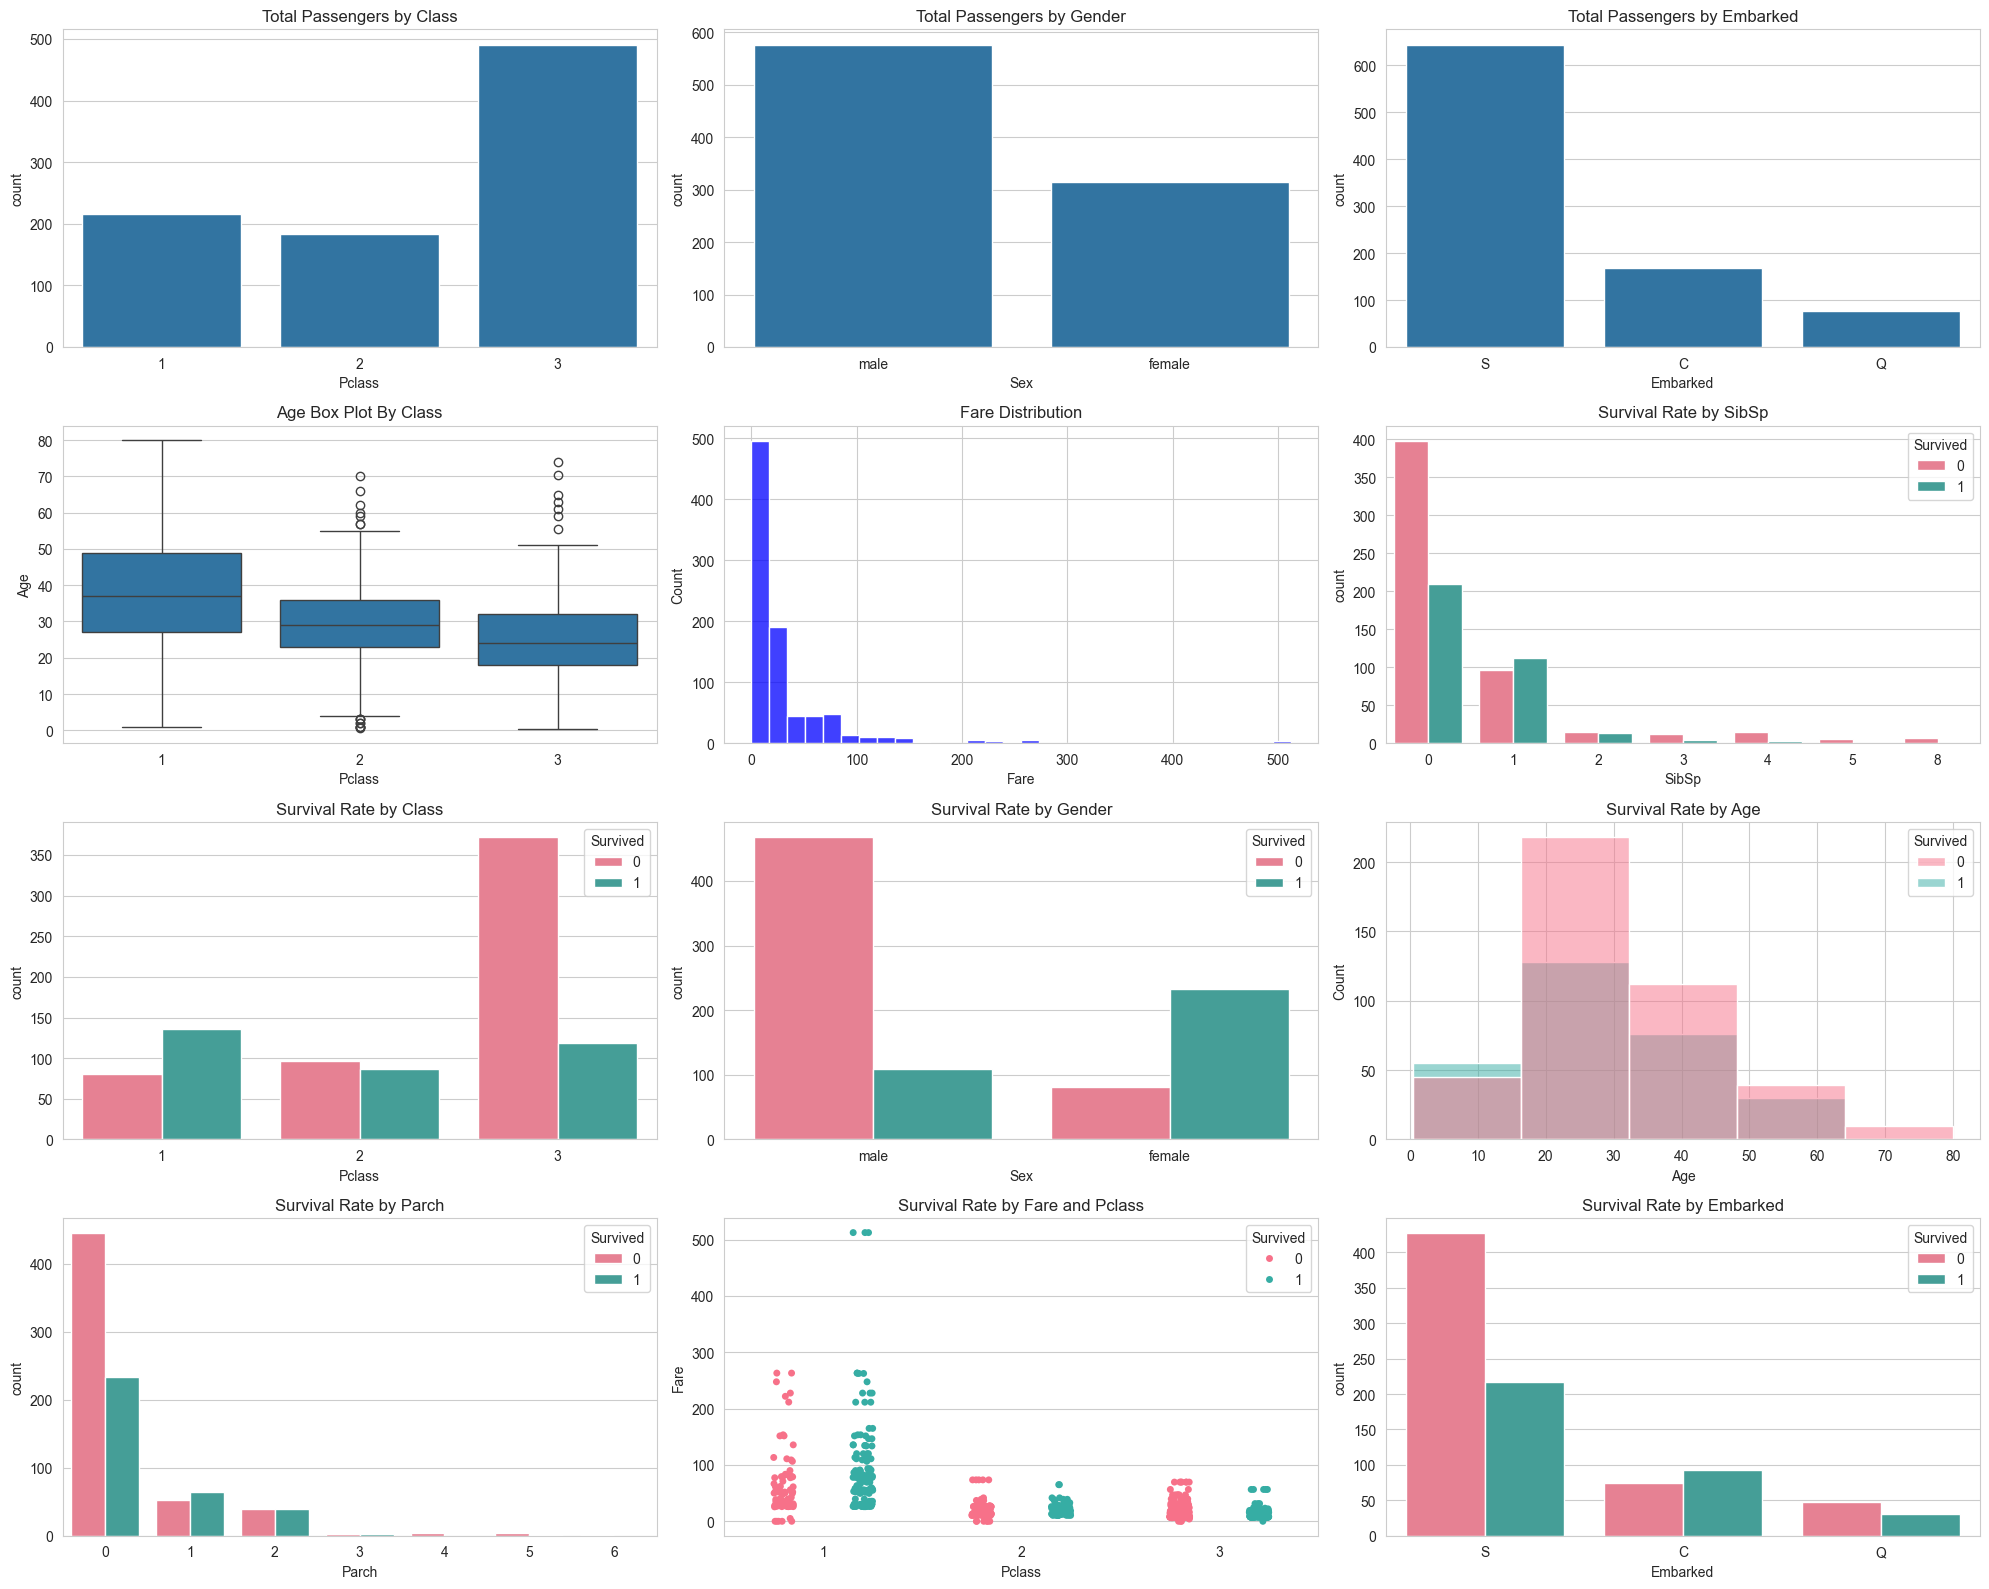

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Define color palette for consistency
palette = "husl"

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 16))

# 1st row
sns.countplot(x='Pclass', data=train, ax=axes[0, 0])
sns.countplot(x='Sex', data=train, ax=axes[0, 1])
sns.countplot(x='Embarked', data=train, ax=axes[0, 2])

# 2nd row
sns.boxplot(x='Pclass', y='Age', data=train, ax=axes[1, 0])
sns.histplot(train['Fare'].dropna(), ax=axes[1, 1], bins=30, color='b')
sns.countplot(x='SibSp', hue='Survived', data=train, ax=axes[1,2], palette=palette)

# 3rd row
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[2, 0], palette=palette)
sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[2, 1], palette=palette)
sns.histplot(x='Age', hue='Survived', data=train, ax=axes[2, 2], bins=5, palette=palette)

# 4th row
sns.countplot(x='Parch', hue='Survived', data=train, ax=axes[3, 0], palette=palette)
sns.stripplot(x='Pclass', y='Fare', hue='Survived', data=train, palette=palette, ax=axes[3, 1], jitter=True, dodge=True)
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axes[3, 2], palette=palette)

# Set titles for each subplot
titles = [
    "Total Passengers by Class", 
    "Total Passengers by Gender", 
    "Total Passengers by Embarked", 
    "Age Box Plot By Class", 
    "Fare Distribution", 
    "Survival Rate by SibSp",
    "Survival Rate by Class", 
    "Survival Rate by Gender", 
    "Survival Rate by Age", 
    "Survival Rate by Parch",
    "Survival Rate by Fare and Pclass", 
    "Survival Rate by Embarked"
]

# Assign titles correctly
for ax, title in zip(axes.flat, titles):
    ax.set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()


# 2. Exploratory Data Analysis

## 2.1 Outlier detection

![](https://miro.medium.com/v2/resize:fit:1400/1*0MPDTLn8KoLApoFvI0P2vQ.png)

In [43]:
import numpy as np
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
